In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df=pd.read_csv("train.csv")
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
df[df.isna().any(axis=1)]
print(df.shape)

(7352, 563)


In [6]:
df_new = df.drop(axis = 1,columns = ["subject","Activity"])
df_new.head()
print(df_new.shape)

(7352, 561)


In [7]:
!pip install kneed

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,homogeneity_score,completeness_score
import seaborn as sns
from kneed import KneeLocator


In [9]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}
wcss = []
silhouette = []
for k in range(1,20):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df_new)
  wcss.append(kmeans.inertia_)

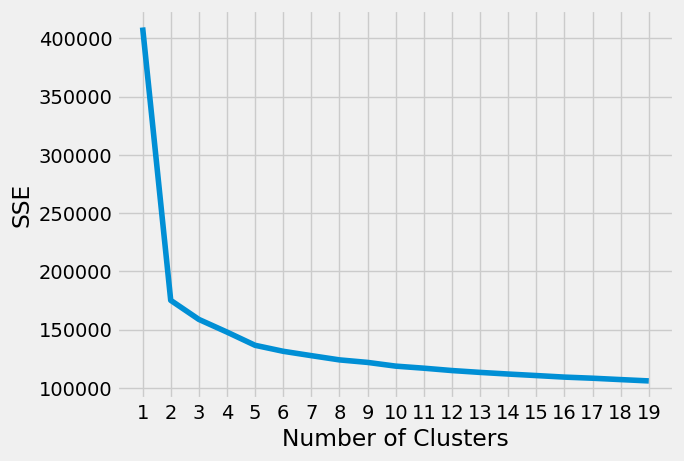

In [10]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,20), wcss)
plt.xticks(range(1,20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [11]:
kl = KneeLocator(range(1, 20), wcss, curve="convex", direction="decreasing")

k_new=kl.elbow
print(k_new)


2


In [12]:
model = KMeans(n_clusters=k_new)
y_pred = model.fit_predict(df_new)
print(y_pred)
df_new['train_predict'] = y_pred

[1 1 1 ... 0 0 0]


In [13]:
wcss = model.inertia_
print("Within-Cluster Sum of Squares (WCSS):", wcss)
klabels = model.labels_
silhouette=silhouette_score(df_new,klabels)
print("Silhouette Score ",silhouette)

Within-Cluster Sum of Squares (WCSS): 175201.8918592118


C:\Users\Ashwanth GP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Silhouette Score  0.48677628049099947


In [16]:
df1 = pd.read_csv('test.csv')
nulls = df1.isna().sum()
print(nulls)
print(df1.shape)
test_df = df1.drop(axis = 1,columns = ["subject","Activity"])
print(test_df.shape)

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64
(2947, 563)
(2947, 561)


In [17]:
model_test = KMeans(n_clusters=k_new)
y_pred_test = model_test.fit_predict(test_df)
print(y_pred_test)
test_df['test_predict'] = y_pred_test

[0 0 0 ... 1 1 1]


In [18]:
wcss_test = model_test.inertia_
print("Within-Cluster Sum of Squares (WCSS):", wcss_test)
klabels = model_test.labels_
silhouette=silhouette_score(test_df,klabels)
print("Silhouette Score ",silhouette)

Within-Cluster Sum of Squares (WCSS): 64699.99414853661


C:\Users\Ashwanth GP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Silhouette Score  0.47618129602154763
